# A Rod-Pendulum System

**Project deadline:** This project is due for submission on Thursday, 26.06.2025, 23:55. Please check carefully the *About the Projects* section below for further details.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We hand-out four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Thursday 26th of June, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## This project

We consider the following system of a rod and two pendulums:

<center><img src="figs/rod-pendulum.png" width=400 /><center/>

The massless rod of length $2L$ can rotate freely around the origin and is assumed to be massless. The system has two mounts (point masses $m_1$ and $m_2$) at the ends of the rod to which two pendulums are connected. The pendulums (lengths $l_1$ and $l_2$) can rotate freely around the mounts. The pendulums consist of two point masses $m_3$ and $m_4$ but are massless otherwise. The only external force on the system is gravitation and the systems movement all take place in the two-dimensional $x-y$ plane.

To simplify things, we set all the four masses equal, i.e. $m = m_1 = m_2 = m_3 = m_4$ and also $l = l_1 = l_2$ with $l < L$.

## Your tasks

1. Identify generalised coordinates of the system. Write down your choice in a markdown cell.
2. Use SymPy to analytically construct the Lagragian and the equations of motion for the system.
3. Use SciPy to numerically solve the equations of motions for different initial conditions (at least 4). Use conditions that show a linear, predictable evolution of the system but also chaotic behaviour. Consider a timeline of around 50 seconds.
4. We want to test whether our numeric solution is reasonable. To this end, consider and discuss the time evolution of the total energy of the system. What is your expectation and does the numeric solution behave as it should? Please investigate longer simulation times for this task.
5. Plot and discuss the time evolution of the energies from rod (masses $m_1$, $m_2$) and the pendulums (masses $m_3$, $m_4$). 
6. Create animations showing the movements of the system.

**Remarks:** (1) In the lecture I concentrated on demonstrating SymPy and how to use it. However, from the point-of-view of *code compactness* and *code reusabilty* the notebook is not good. I basically just continuously repeated and duplicated code for the two masses and for the two generalised coordinates. This becomes cumbersome and error-prone if more masses/coordinates are involved and quickly unmaintainable if you decide to modify the system, add new masses etc. Hence, please structure your project code and data in a better way from the very beginning; (2) In the SciPy lecture, I mentioned that, besides `odeint`, there is a second numeric solver `solve_ivp` within `scipy.integrate`. One possibility to earn bonus points is to compare and to discuss solutions of both solvers.

In [25]:
# import needed packages
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib import animation

## Task 1
For the generalised coordinates I choose three angles: $\theta_1$, $\theta_2$ and $\theta_3$, where $\theta_1$ is the angle between the rod connecting the origin and mass $m_1$ 
and the horizontal. \
$\theta_2$ describes the angle between the the rod connecting $m_1$ and $m_3$ and the horizontal.
$\theta_3$ describes the angle between the the rod connecting $m_2$ and $m_4$ and the horizontal.

## Task 2

In [26]:
# define the necessary constants and variables
L, l, t, m, g= sp.symbols(r'L l t m g')
theta1, theta2, theta3 = sp.symbols(r'\theta_1 \theta_2 \theta_3', cls=sp.Function)
theta1 = theta1(t)
theta2 = theta2(t)
theta3 = theta3(t)

# create first and second derivative of the thetas
theta1_d = sp.diff(theta1, t)
theta2_d = sp.diff(theta2, t)
theta3_d = sp.diff(theta3, t)
theta1_dd = sp.diff(theta1_d, t)
theta2_dd = sp.diff(theta2_d, t)
theta3_dd = sp.diff(theta3_d, t)

# define the x and y coordinates of the four masses in terms of the generalised coordinates
x1 = L * sp.cos(theta1)
y1 = L * sp.sin(theta1)

x2 = -x1
y2 = -y1 

x3 = x1 + l * sp.cos(theta2)
y3 = y1 + l * sp.sin(theta2)

x4 = x2 + l * sp.cos(theta3)
y4 = y2 + l * sp.sin(theta3)

# define the kinetic and potential energies for all masses
T1 = sp.Rational(1, 2) * m * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2)
V1 = m * g * y1
T2 = sp.Rational(1, 2) * m * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2)
V2 = m * g * y2
T3 = sp.Rational(1, 2) * m * (sp.diff(x3, t)**2 + sp.diff(y3, t)**2)
V3 = m * g * y3
T4 = sp.Rational(1, 2) * m * (sp.diff(x4, t)**2 + sp.diff(y4, t)**2)
V4 = m * g * y4

# define total kinetic and potential energies of the system and the Lagrangian
T = (T1 + T2 + T3 + T4).simplify()
V = (V1 + V2 + V3 + V4).simplify()
Lagrange = (T - V).simplify()

# create the Lagrange's equations
LE1 = (sp.diff(Lagrange, theta1) - sp.diff(sp.diff(Lagrange, theta1_d), t)).simplify()
LE2 = (sp.diff(Lagrange, theta2) - sp.diff(sp.diff(Lagrange, theta2_d), t)).simplify()
LE3 = (sp.diff(Lagrange, theta3) - sp.diff(sp.diff(Lagrange, theta3_d), t)).simplify()

# create the equations of motion for the system
sol = sp.solve([LE1, LE2, LE3],  [theta1_dd, theta2_dd, theta3_dd])

# convert symbolic expressions to numerical functions so they can be used 
theta1_dd_n = sp.lambdify((theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g), sol[theta1_dd].simplify())

theta2_dd_n = sp.lambdify([theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g], sol[theta2_dd].simplify())
                           
theta3_dd_n = sp.lambdify([theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g], sol[theta3_dd].simplify())

def dSdt(S, t, L, l, m, g):
    ''' This function takes in S and t and returns dS/dt to convert the second order DGL into a first oder DGL'''
    theta1, theta2, theta3, u, v, w = S
    
    dtheta1dt = u
    dtheta2dt = v
    dtheta3dt = w
    dudt = theta1_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    dvdt = theta2_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    dwdt = theta3_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    
    return [dtheta1dt, dtheta2dt, dtheta3dt, dudt, dvdt, dwdt]


## Task 3

In [84]:
# define the number of frames and seconds for the animation of the pendulum system
n_seconds = 50
n_frames = 1000
t_n = np.linspace(0.0, n_seconds, n_frames)

# set the constants and define a set of initial conditions
L, l, m, g = 5, 2, 0.5, 9.81

S0 = [0, 0, np.pi, 0, 0, 0]
S1 = [np.pi/4, 3*np.pi/2, 0, 0, 0, 0]
S2 = [np.pi, np.pi, 0, -2, 0, 5]
S3 = [0, np.pi/3, np.pi/2, 1, 2, 0]


# solve the set of equations for the different sets of initial conditions 
sol_dgl_s0 = si.odeint(dSdt, S0, t=t_n, args=(L, l, m, g))
sol_dgl_s1 = si.odeint(dSdt, S1, t=t_n, args=(L, l, m, g))
sol_dgl_s2 = si.odeint(dSdt, S2, t=t_n, args=(L, l, m, g))
sol_dgl_s3 = si.odeint(dSdt, S3, t=t_n, args=(L, l, m, g))


def get_xy(theta1, theta2, theta3):
    '''This function takes the three angles and calculates the x and y positions of all 4 masses for each time t of the solution'''    
    return (L * np.cos(theta1),
            L * np.sin(theta1),
            - L * np.cos(theta1),
            - L * np.sin(theta1),
            L * np.cos(theta1) + l * np.cos(theta2),
            L * np.sin(theta1) + l * np.sin(theta2),
            - L * np.cos(theta1) + l * np.cos(theta3),
            - L * np.sin(theta1) + l * np.sin(theta3)
    )

# get the x and y values for all initial conditions for all times t 
x1_n_s0, y1_n_s0, x2_n_s0, y2_n_s0, x3_n_s0, y3_n_s0, x4_n_s0, y4_n_s0 = get_xy(sol_dgl_s0[:,0], sol_dgl_s0[:,1], sol_dgl_s0[:,2])
x1_n_s1, y1_n_s1, x2_n_s1, y2_n_s1, x3_n_s1, y3_n_s1, x4_n_s1, y4_n_s1 = get_xy(sol_dgl_s1[:,0], sol_dgl_s1[:,1], sol_dgl_s1[:,2])
x1_n_s2, y1_n_s2, x2_n_s2, y2_n_s2, x3_n_s2, y3_n_s2, x4_n_s2, y4_n_s2 = get_xy(sol_dgl_s2[:,0], sol_dgl_s2[:,1], sol_dgl_s2[:,2])
x1_n_s3, y1_n_s3, x2_n_s3, y2_n_s3, x3_n_s3, y3_n_s3, x4_n_s3, y4_n_s3 = get_xy(sol_dgl_s3[:,0], sol_dgl_s3[:,1], sol_dgl_s3[:,2])

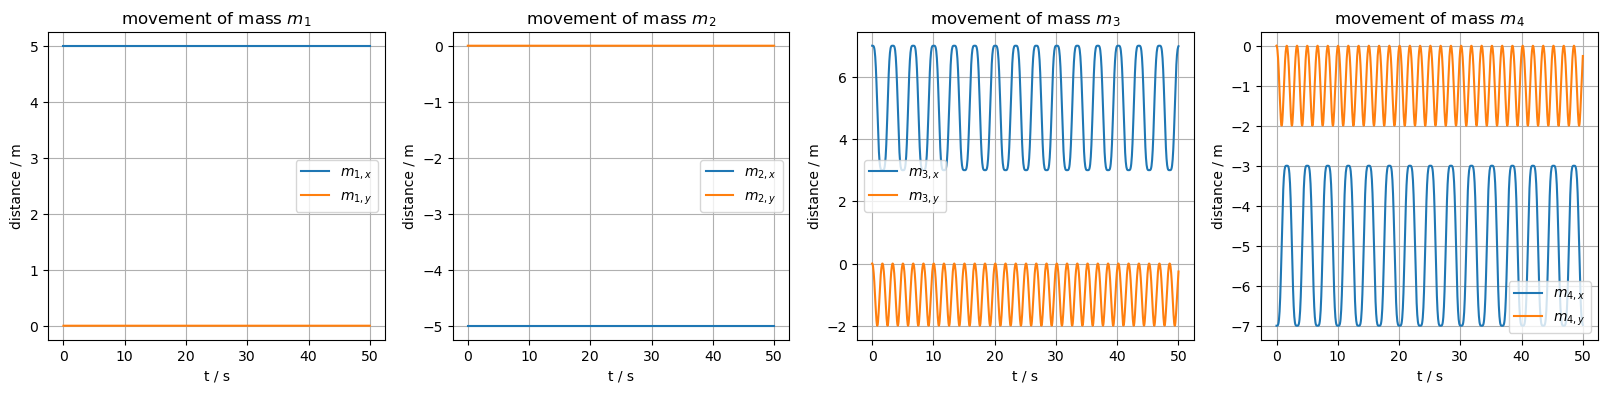

In [85]:
# plot the x and y values of the 4 masses against the time for solutions S0
fig, ax = plt.subplots(1,4, figsize=(20,4))

# mass m1 
ax[0].plot(t_n, x1_n_s0, label=r'$m_{1,x}$')
ax[0].plot(t_n, y1_n_s0, label=r'$m_{1,y}$')
ax[0].set_title(r'movement of mass $m_1$')

# mass m2
ax[1].plot(t_n, x2_n_s0, label=r'$m_{2,x}$')
ax[1].plot(t_n, y2_n_s0, label=r'$m_{2,y}$')
ax[1].set_title(r'movement of mass $m_2$')

# mass m3
ax[2].plot(t_n, x3_n_s0, label=r'$m_{3,x}$')
ax[2].plot(t_n, y3_n_s0, label=r'$m_{3,y}$')
ax[2].set_title(r'movement of mass $m_3$')

# mass m4
ax[3].plot(t_n, x4_n_s0, label=r'$m_{4,x}$')
ax[3].plot(t_n, y4_n_s0, label=r'$m_{4,y}$')
ax[3].set_title(r'movement of mass $m_4$')

# set axis and legend
i = 0
while i <= 3:
    ax[i].set_xlabel(r't / s')
    ax[i].set_ylabel(r'distance / m')
    ax[i].legend()
    ax[i].grid()
    i = i + 1



This clearly shows a predictable evolution of the system, since only mass $m_3$ and $m_4$ are oscillating between two positions.

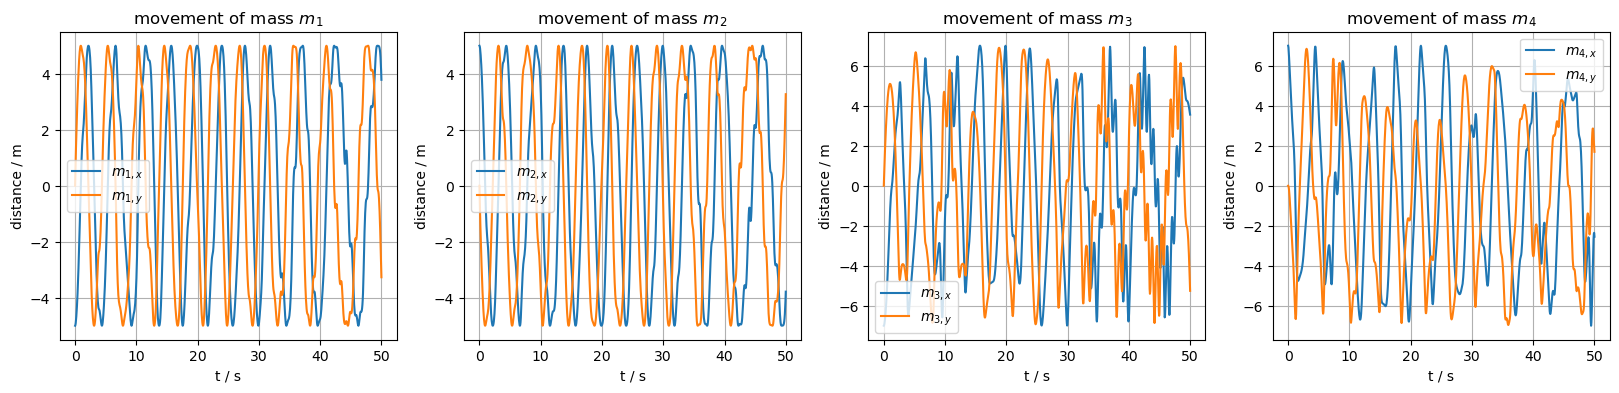

In [86]:
# plot the x and y values of the 4 masses against the time for solutions S2
fig, ax = plt.subplots(1,4, figsize=(20,4))

# mass m1 
ax[0].plot(t_n, x1_n_s2, label=r'$m_{1,x}$')
ax[0].plot(t_n, y1_n_s2, label=r'$m_{1,y}$')
ax[0].set_title(r'movement of mass $m_1$')

# mass m2
ax[1].plot(t_n, x2_n_s2, label=r'$m_{2,x}$')
ax[1].plot(t_n, y2_n_s2, label=r'$m_{2,y}$')
ax[1].set_title(r'movement of mass $m_2$')

# mass m3
ax[2].plot(t_n, x3_n_s2, label=r'$m_{3,x}$')
ax[2].plot(t_n, y3_n_s2, label=r'$m_{3,y}$')
ax[2].set_title(r'movement of mass $m_3$')

# mass m4
ax[3].plot(t_n, x4_n_s2, label=r'$m_{4,x}$')
ax[3].plot(t_n, y4_n_s2, label=r'$m_{4,y}$')
ax[3].set_title(r'movement of mass $m_4$')

# set axis and legend
i = 0
while i <= 3:
    ax[i].set_xlabel(r't / s')
    ax[i].set_ylabel(r'distance / m')
    ax[i].legend()
    ax[i].grid()
    i = i + 1



This is an example of a more chaotic behavior of the system. Masses $m_1$ and $m_2$ spin around the origin in a motion that is similar to an oscillation, \
masses $m_3$ and $m_4$ however spin around in a rather uncontrolled way.  

## Task 4

In [125]:
def energies(sol_dgl):
    '''this function calculates the potential and kinetic energies of all 4 masses and returns the total energy of the system as well as the energy of the 
    the rod (mass m1 and m2) and the energy of the pendulums (m3 and m4)'''
    # calculate velocities in x and y direction for all masses
    vx1 = - L * np.sin(sol_dgl[:,0]) * sol_dgl[:,3]
    vy1 = L * np.cos(sol_dgl[:,0]) * sol_dgl[:,3] 

    vx2 = -vx1
    vy2 = -vy1

    vx3 = vx1 - l * np.sin(sol_dgl[:,1]) * sol_dgl[:,4] 
    vy3 = vy1 + l * np.cos(sol_dgl[:,1]) * sol_dgl[:,4]

    vx4 = vx2 - l * np.sin(sol_dgl[:,2]) * sol_dgl[:,5]
    vy4 = vy2 + l * np.cos(sol_dgl[:,2]) * sol_dgl[:,5]

    # get kinetic energies of the 4 masses 
    KE1 = 0.5 * m * (vx1**2 + vy1**2)
    KE2 = 0.5 * m * (vx2**2 + vy2**2)
    KE3 = 0.5 * m * (vx3**2 + vy3**2)
    KE4 = 0.5 * m * (vx4**2 + vy4**2)

    # get potential energies of the 4 masses
    PE1 = m * g * get_xy(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])[1]
    PE2 = m * g * get_xy(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])[3]
    PE3 = m * g * get_xy(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])[5]
    PE4 = m * g * get_xy(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])[7]

    # calculate total energy of the system and plot it
    E_total = KE1 + KE2 + KE3 + KE4 + PE1 + PE2 + PE3 + PE4
    E_rod = KE1 + KE2 + PE1 + PE2
    E_pend = KE3 + KE4 + PE3 + PE4

    return E_total, E_rod, E_pend



# redefine the number of frames and seconds for the animation of the pendulum system since we want to look at longer simulation times
n_seconds_long = 2000
n_frames_long = 4000
t_n_long = np.linspace(0.0, n_seconds_long, n_frames_long)

# solve the system of equations for all sets of initial conditions for the longer times
sol_dgl_s0_long = si.odeint(dSdt, S0, t=t_n_long, args=(L, l, m, g))
sol_dgl_s1_long = si.odeint(dSdt, S1, t=t_n_long, args=(L, l, m, g))
sol_dgl_s2_long = si.odeint(dSdt, S2, t=t_n_long, args=(L, l, m, g))
sol_dgl_s3_long = si.odeint(dSdt, S3, t=t_n_long, args=(L, l, m, g))

# extract x and y values
x1_n_s0_long, y1_n_s0_long, x2_n_s0_long, y2_n_s0_long, x3_n_s0_long, y3_n_s0_long, x4_n_s0_long, y4_n_s0_long = get_xy(sol_dgl_s0_long[:,0], sol_dgl_s0_long[:,1], sol_dgl_s0_long[:,2])
x1_n_s1_long, y1_n_s1_long, x2_n_s1_long, y2_n_s1_long, x3_n_s1_long, y3_n_s1_long, x4_n_s1_long, y4_n_s1_long = get_xy(sol_dgl_s1_long[:,0], sol_dgl_s1_long[:,1], sol_dgl_s1_long[:,2])
x1_n_s2_long, y1_n_s2_long, x2_n_s2_long, y2_n_s2_long, x3_n_s2_long, y3_n_s2_long, x4_n_s2_long, y4_n_s2_long = get_xy(sol_dgl_s2_long[:,0], sol_dgl_s2_long[:,1], sol_dgl_s2_long[:,2])
x1_n_s3_long, y1_n_s3_long, x2_n_s3_long, y2_n_s3_long, x3_n_s3_long, y3_n_s3_long, x4_n_s3_long, y4_n_s3_long = get_xy(sol_dgl_s3_long[:,0], sol_dgl_s3_long[:,1], sol_dgl_s3_long[:,2])

# calculate the energies for the different initial conditions
e_s0 = energies(sol_dgl_s0_long)
e_s1 = energies(sol_dgl_s1_long)
e_s2 = energies(sol_dgl_s2_long)
e_s3 = energies(sol_dgl_s3_long)

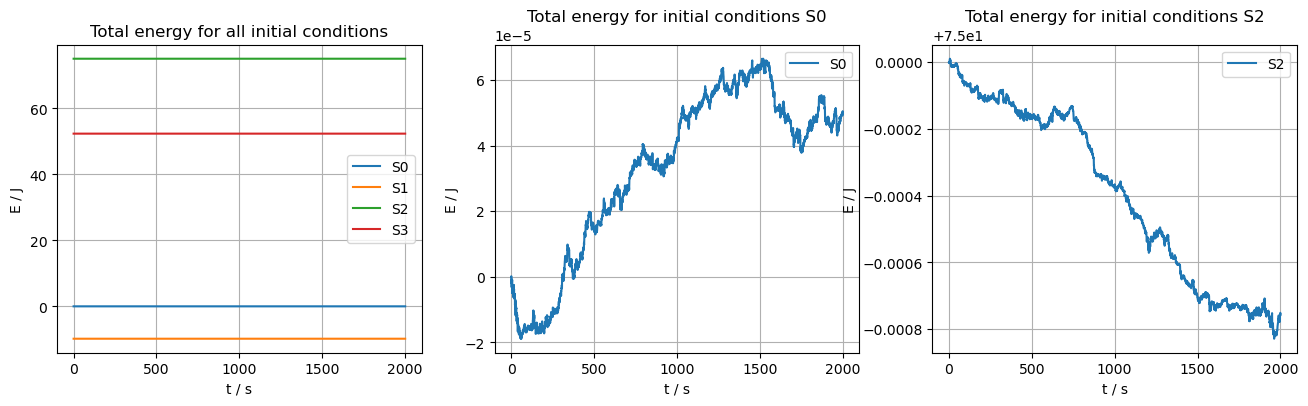

In [126]:
# plot the total energy for all initial conditions
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].plot(t_n_long, e_s0[0], label=r'S0')
ax[0].plot(t_n_long, e_s1[0], label=r'S1')
ax[0].plot(t_n_long, e_s2[0], label=r'S2')
ax[0].plot(t_n_long, e_s3[0], label=r'S3')
ax[0].set_title('Total energy for all initial conditions')

# plot energy just for S0
ax[1].plot(t_n_long, e_s0[0], label=r'S0')
ax[1].set_title('Total energy for initial conditions S0')

# plot energy just for S2
ax[2].plot(t_n_long, e_s2[0], label=r'S2')
ax[2].set_title('Total energy for initial conditions S2')

# labels and legends
i = 0
while i <= 2:
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel(r't / s')
    ax[i].set_ylabel(r'E / J')
    i +=1

## Observations
From the first plot we can see, that the total energy of the systems stays constant. This is expected, since the system we are looking at is assumed to be ideal, \
meaning that there is not air resistance or friction etc. Therefore the total energy in the system, in form of potential and kinetic energy of the 4 masses, should not change \
since there is no energy added or taken away from the system. \
Therefore energy is only transferred from potential to kinetic energy and vise versa.

When looking at the energy from one set of initial conditions like in the second and third plot, there are some small fluctuations in the total energy.\
This is most likely due to the fact that the solution to the differential equations is achieved numerically, therefore the result is always an approximation with a accuracy. \
But since the fluctuation are so small, this will most likely only be a problem for very long simulation times, if at all.

## Task 5

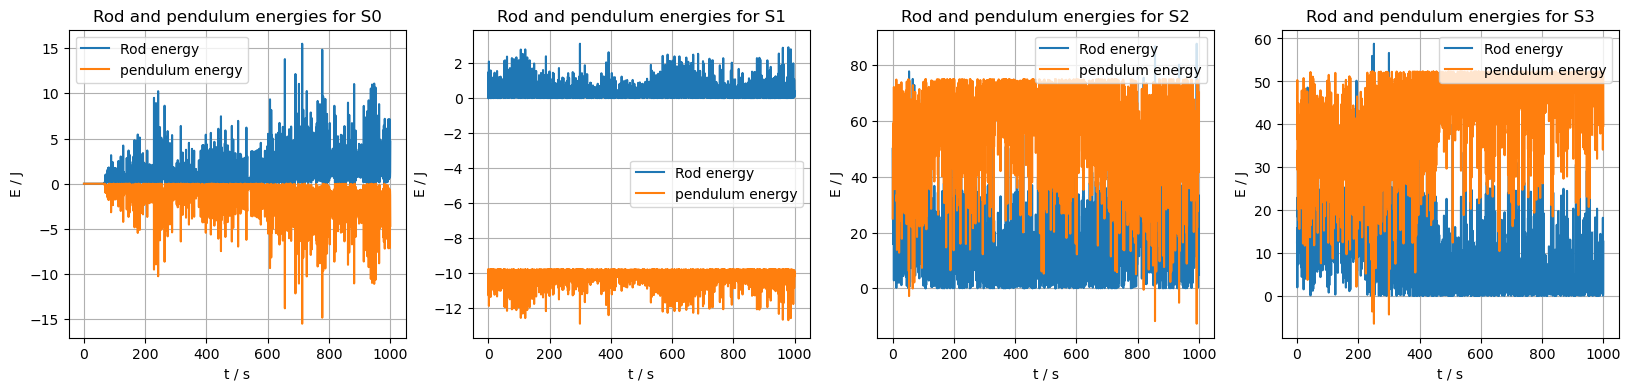

In [122]:
# plot the total energy for all initial conditions
fig, ax = plt.subplots(1,4, figsize=(20,4))

# plot rod energy for S0
ax[0].plot(t_n_long, e_s0[1], label=r'Rod energy')
ax[0].plot(t_n_long, e_s0[2], label=r'pendulum energy')
ax[0].set_title('Rod and pendulum energies for S0')

# plot rod energy just for S1
ax[1].plot(t_n_long, e_s1[1], label=r'Rod energy')
ax[1].plot(t_n_long, e_s1[2], label=r'pendulum energy')
ax[1].set_title('Rod and pendulum energies for S1')

# plot energy just for S2
ax[2].plot(t_n_long, e_s2[1], label=r'Rod energy')
ax[2].plot(t_n_long, e_s2[2], label=r'pendulum energy')
ax[2].set_title('Rod and pendulum energies for S2')

# plot energy just for S3
ax[3].plot(t_n_long, e_s3[1], label=r'Rod energy')
ax[3].plot(t_n_long, e_s3[2], label=r'pendulum energy')
ax[3].set_title('Rod and pendulum energies for S3')

# labels and legends
i = 0
while i <= 3:
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel(r't / s')
    ax[i].set_ylabel(r'E / J')
    i +=1

# set legend for ax[3] by hand, because automatic location made plot less visible
ax[3].legend(loc='upper right')

## Observations
When looking at the energies of the rod (masses $m_1$ and $m_2$) compared to those of the pendulums (masses $m_3$ and $m_4$) we can see, that the energy in the rod is always the same as the energy in the two pendulums, just with different signs.

## Task 6

First animation is for initial conditions $S0$, showing a predicable oscillator like evolution of the system.

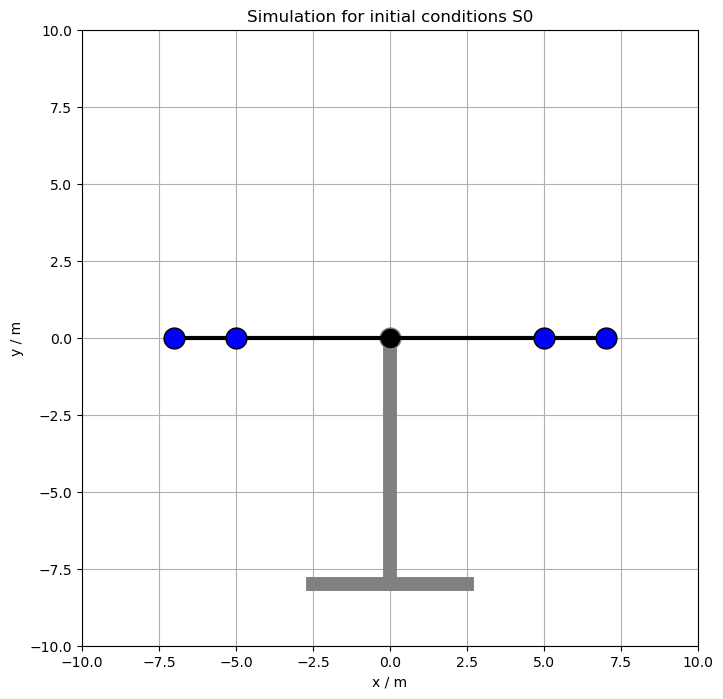

In [128]:
# animation of system with initial conditions S0 
def animate(i, ln1):
    # base of the pendulum system
    ln4.set_data([0],[0])
    ln3.set_data([0,0],[0,-8])
    ln2.set_data([-2.5,2.5],[-8,-8])
    # data of the actual masses
    ln1.set_data([x4_n_s0[i] ,x2_n_s0[i], x1_n_s0[i], x3_n_s0[i]], [y4_n_s0[i], y2_n_s0[i], y1_n_s0[i], y3_n_s0[i]])
    
    return ln1,

# create figure and plot different components of the pendulum system
fig, ax = plt.subplots(1,1, figsize=(8,8))

ln3, = plt.plot([], lw=10, markersize=0, marker='o', 
                color='gray', markerfacecolor='blue')
ln4, = plt.plot([], lw=10, markersize=15, marker='o', 
                color='gray', markerfacecolor='black')
ln2, = plt.plot([], lw=10, markersize=0, marker='o', 
                color='gray', markerfacecolor='blue')
ln1, = plt.plot([], lw=3, markersize=15, marker='o', 
                color='black', markerfacecolor='blue')

# labels, limits, title
ax.set_xlabel(r'x / m')
ax.set_ylabel(r'y / m')
ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ax.grid()
ax.set_aspect('equal')
ax.set_title('Simulation for initial conditions S0')

# create and save animation
ani = animation.FuncAnimation(fig, animate, fargs=(ln1,),
                              frames=n_frames)

ani.save('pendulum_s0.gif', writer='pillow', fps=(n_frames / n_seconds))

The second animation shows more chaotic evolution of the system, using the initial conditions $S2$. 

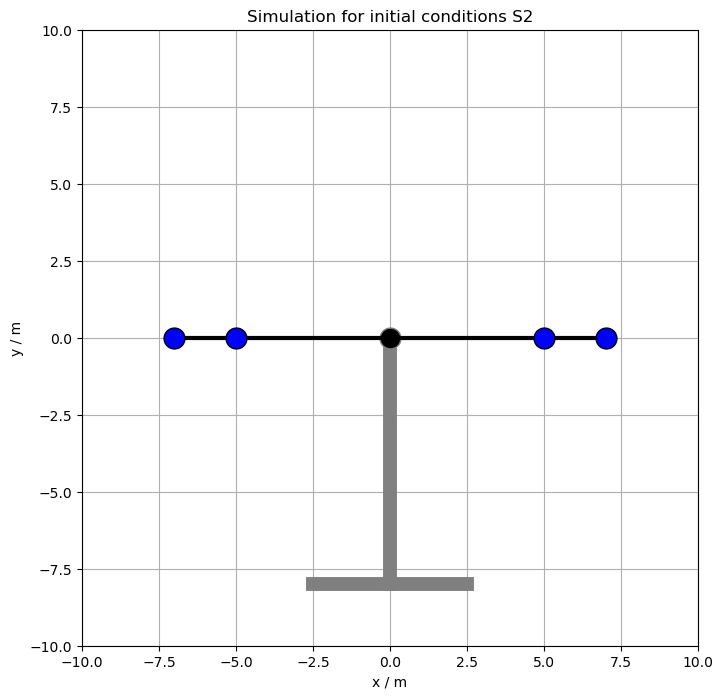

In [130]:
# animation of system with initial conditions S2 
def animate(i, ln1):
    # base of the pendulum system
    ln4.set_data([0],[0])
    ln3.set_data([0,0],[0,-8])
    ln2.set_data([-2.5,2.5],[-8,-8])
    # data of the actual masses
    ln1.set_data([x4_n_s2[i] ,x2_n_s2[i], x1_n_s2[i], x3_n_s2[i]], [y4_n_s2[i], y2_n_s2[i], y1_n_s2[i], y3_n_s2[i]])
    
    return ln1,

# create figure and plot different components of the pendulum system
fig, ax = plt.subplots(1,1, figsize=(8,8))

ln3, = plt.plot([], lw=10, markersize=0, marker='o', 
                color='gray', markerfacecolor='blue')
ln4, = plt.plot([], lw=10, markersize=15, marker='o', 
                color='gray', markerfacecolor='black')
ln2, = plt.plot([], lw=10, markersize=0, marker='o', 
                color='gray', markerfacecolor='blue')
ln1, = plt.plot([], lw=3, markersize=15, marker='o', 
                color='black', markerfacecolor='blue')

# labels, limits, title
ax.set_xlabel(r'x / m')
ax.set_ylabel(r'y / m')
ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ax.grid()
ax.set_aspect('equal')
ax.set_title('Simulation for initial conditions S2')

# create and save animation
ani = animation.FuncAnimation(fig, animate, fargs=(ln1,),
                              frames=n_frames)

ani.save('pendulum_s2.gif', writer='pillow', fps=(n_frames / n_seconds))